<a href="https://colab.research.google.com/github/Jane0731/Homework/blob/main/LSTM_%E9%A0%90%E6%B8%AC_%E5%95%86%E6%A5%AD%E6%99%BA%E6%85%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用 Kaggle 下載 Jena Climate Dataset

In [1]:
from google.colab import files
files.upload()  # 上傳 kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jane0731","key":"da1b845a1dcf94da4d08f3a423f403b0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mnassrib/jena-climate
!unzip jena-climate.zip

Dataset URL: https://www.kaggle.com/datasets/mnassrib/jena-climate
License(s): copyright-authors
jena-climate.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  jena-climate.zip
  inflating: jena_climate_2009_2016.csv  


# 資料前處理

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df.shape,df.head()

((420551, 15),
              Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
 0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
 1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
 2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
 3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
 4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
 
    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
 0          3.33          3.11          0.22       1.94             3.12   
 1          3.23          3.02          0.21       1.89             3.03   
 2          3.21          3.01          0.20       1.88             3.02   
 3          3.26          3.07          0.19       1.92             3.08   
 4          3.27          3.08          0.19       1.92             3.09   
 
    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
 0 

In [15]:
df.isnull().sum()

,0
Date Time,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0


In [16]:
if 'Date Time' in df.columns:
    df['Date Time'] = pd.to_datetime(df['Date Time'],dayfirst=True)
    df.set_index('Date Time', inplace=True)

df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [17]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(scaled_values, index=df.index, columns=df.columns)

df_scaled.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,0.874230,-2.074013,-2.127441,-2.058615,1.049501,-1.323974,-1.535256,-0.780587,-1.536973,-1.539462,2.293606,-0.010271,-0.018931,-0.258922
2009-01-01 00:20:00,0.880212,-2.120313,-2.173300,-2.115073,1.055570,-1.336896,-1.556766,-0.782629,-1.555797,-1.560712,2.344887,-0.015008,-0.022553,-0.445813
2009-01-01 00:30:00,0.875426,-2.132184,-2.185058,-2.119531,1.085917,-1.339480,-1.559156,-0.784671,-1.559562,-1.563073,2.355894,-0.023106,-0.035159,-0.036268
2009-01-01 00:40:00,0.873033,-2.108441,-2.160365,-2.083873,1.104125,-1.333019,-1.544816,-0.786713,-1.544502,-1.548907,2.329628,-0.020814,-0.037042,0.268295
2009-01-01 00:50:00,0.873033,-2.103692,-2.156838,-2.079416,1.098056,-1.331727,-1.542426,-0.786713,-1.544502,-1.546546,2.324875,-0.021120,-0.035159,0.456340


# 建立序列資料

In [18]:
import numpy as np

In [19]:
def create_sequences(data, seq_length, target_col=0):
    """
    data: numpy array (所有特徵已標準化)
    seq_length: 序列長度，例如 24
    target_col: 目標變數所在的欄位索引，這裡以 0 表示預測第一個特徵
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, target_col])
    return np.array(X), np.array(y)

In [20]:
data_array = df_scaled.values
sequence_length = 24
X, y = create_sequences(data_array, sequence_length)

In [21]:
X,X.shape

(array([[[ 0.87422976, -2.0740129 , -2.12744145, ..., -0.01027133,
          -0.01893096, -0.25892163],
         [ 0.88021172, -2.12031274, -2.17329974, ..., -0.01500801,
          -0.02255326, -0.44581253],
         [ 0.87542615, -2.1321845 , -2.18505827, ..., -0.02310621,
          -0.03515888, -0.03626766],
         ...,
         [ 0.94362045, -2.17373563, -2.23091655, ..., -0.02157825,
          -0.03342018, -0.28891646],
         [ 0.93883488, -2.18916891, -2.24620265, ..., -0.02417579,
          -0.03515888,  0.65707449],
         [ 0.93046014, -2.19629197, -2.25208192, ..., -0.02448138,
          -0.03878119,  0.75282724]],
 
        [[ 0.88021172, -2.12031274, -2.17329974, ..., -0.01500801,
          -0.02255326, -0.44581253],
         [ 0.87542615, -2.1321845 , -2.18505827, ..., -0.02310621,
          -0.03515888, -0.03626766],
         [ 0.87303337, -2.10844099, -2.16036535, ..., -0.02081427,
          -0.03704248,  0.26829528],
         ...,
         [ 0.93883488, -2.1891689

In [22]:
y,y.shape

(array([0.93763849, 0.94481684, 0.95438797, ..., 1.26903882, 1.26784243,
        1.26903882]),
 (420527,))

In [24]:
import torch

In [25]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 切分訓練與測試資料

In [26]:
# 使用 80% 資料做訓練，其餘作測試
split_index = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:split_index], X_tensor[split_index:]
y_train, y_test = y_tensor[:split_index], y_tensor[split_index:]

In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([336421, 24, 14]),
 torch.Size([336421]),
 torch.Size([84106, 24, 14]),
 torch.Size([84106]))

In [32]:
from torch.utils.data import DataLoader, TensorDataset

In [33]:
# 建立 DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 定義模型

In [34]:
import torch.nn as nn

# 自訂 Attention 層
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim, hidden_dim)
        # 這個 context_vector 會學習如何評估隱藏狀態的重要性
        self.context_vector = nn.Parameter(torch.randn(hidden_dim))

    def forward(self, lstm_outputs):
        # lstm_outputs: shape (batch_size, seq_length, hidden_dim)
        # 計算注意力分數
        attn_scores = torch.tanh(self.attn(lstm_outputs))  # (batch_size, seq_length, hidden_dim)
        # 將 context_vector 與每個時間點的輸出作內積，得到分數 (batch_size, seq_length)
        attn_scores = torch.matmul(attn_scores, self.context_vector.unsqueeze(-1)).squeeze(-1)
        attn_weights = torch.softmax(attn_scores, dim=1)  # 正規化後的權重

        # 利用注意力權重對隱藏狀態進行加權求和
        context = torch.sum(lstm_outputs * attn_weights.unsqueeze(-1), dim=1)  # (batch_size, hidden_dim)
        return context, attn_weights

# 定義包含 LSTM 與 Attention 的模型
class LSTMWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.1):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers,
                            batch_first=True, dropout=dropout)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x: (batch_size, seq_length, input_dim)
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch_size, seq_length, hidden_dim)
        # 使用注意力機制
        context, attn_weights = self.attention(lstm_out)  # context: (batch_size, hidden_dim)
        output = self.fc(context)  # 輸出預測值
        return output, attn_weights


In [35]:
# 設定模型參數
input_dim = X_train.shape[2]  # 特徵數量
hidden_dim = 64
num_layers = 2
output_dim = 1  # 預測單一連續值
dropout = 0.1

model = LSTMWithAttention(input_dim, hidden_dim, num_layers, output_dim, dropout)

# 設定運算裝置 (GPU 或 CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTMWithAttention(
  (lstm): LSTM(14, 64, num_layers=2, batch_first=True, dropout=0.1)
  (attention): Attention(
    (attn): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [36]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs, attn_weights = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)

    train_loss /= len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}")


Epoch 1/20, Loss: 0.0050
Epoch 2/20, Loss: 0.0021
Epoch 3/20, Loss: 0.0017
Epoch 4/20, Loss: 0.0013
Epoch 5/20, Loss: 0.0012
Epoch 6/20, Loss: 0.0008
Epoch 7/20, Loss: 0.0006
Epoch 8/20, Loss: 0.0011
Epoch 9/20, Loss: 0.0007
Epoch 10/20, Loss: 0.0012
Epoch 11/20, Loss: 0.0011
Epoch 12/20, Loss: 0.0007
Epoch 13/20, Loss: 0.0008
Epoch 14/20, Loss: 0.0006
Epoch 15/20, Loss: 0.0008
Epoch 16/20, Loss: 0.0010
Epoch 17/20, Loss: 0.0010
Epoch 18/20, Loss: 0.0008
Epoch 19/20, Loss: 0.0007
Epoch 20/20, Loss: 0.0006
Test Loss: 0.0417


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 假設 model、test_loader、device、scaler 已經定義好
model.eval()
predictions = []
actuals = []

# 利用 test_loader 進行批次預測
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs, _ = model(batch_X)
        # 收集預測與真實值 (轉換至 CPU 並轉成 numpy array)
        predictions.extend(outputs.squeeze().cpu().numpy())
        actuals.extend(batch_y.cpu().numpy())

predictions = np.array(predictions)  # 標準化後的預測值
actuals = np.array(actuals)          # 標準化後的真實值

# 反標準化處理
# 假設你的 StandardScaler 是針對所有特徵做 fit_transform，
# 而這裡只預測單一目標變數，假設該變數在第 0 個欄位
target_idx = 0
n_features = scaler.mean_.shape[0]

# 先建立 dummy 陣列，僅將預測/真實值放入 target_idx 位置，其他欄位設為 0
preds_combined = np.zeros((predictions.shape[0], n_features))
preds_combined[:, target_idx] = predictions
predictions_inv = scaler.inverse_transform(preds_combined)[:, target_idx]

actuals_combined = np.zeros((actuals.shape[0], n_features))
actuals_combined[:, target_idx] = actuals
actuals_inv = scaler.inverse_transform(actuals_combined)[:, target_idx]

r2 = r2_score(actuals_inv, predictions_inv)
print("R² Score:", r2)

# 計算反標準化後的誤差
differences_inv = predictions_inv - actuals_inv
mse_inv = np.mean(differences_inv ** 2)
mae_inv = np.mean(np.abs(differences_inv))

print("Inverse Mean Squared Error (MSE):", mse_inv)
print("Inverse Mean Absolute Error (MAE):", mae_inv)


R² Score: 0.9568554605444581
Inverse Mean Squared Error (MSE): 2.9155790110873747
Inverse Mean Absolute Error (MAE): 1.5306963702791117


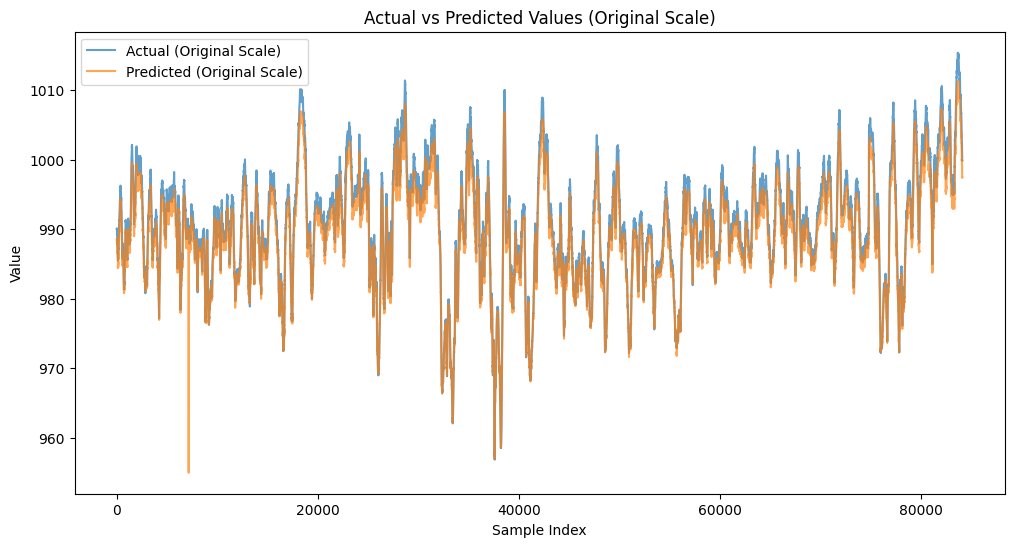

In [40]:
# 繪製反標準化後的預測值與真實值比較圖
plt.figure(figsize=(12, 6))
plt.plot(actuals_inv, label='Actual (Original Scale)', alpha=0.7)
plt.plot(predictions_inv, label='Predicted (Original Scale)', alpha=0.7)
plt.title("Actual vs Predicted Values (Original Scale)")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()

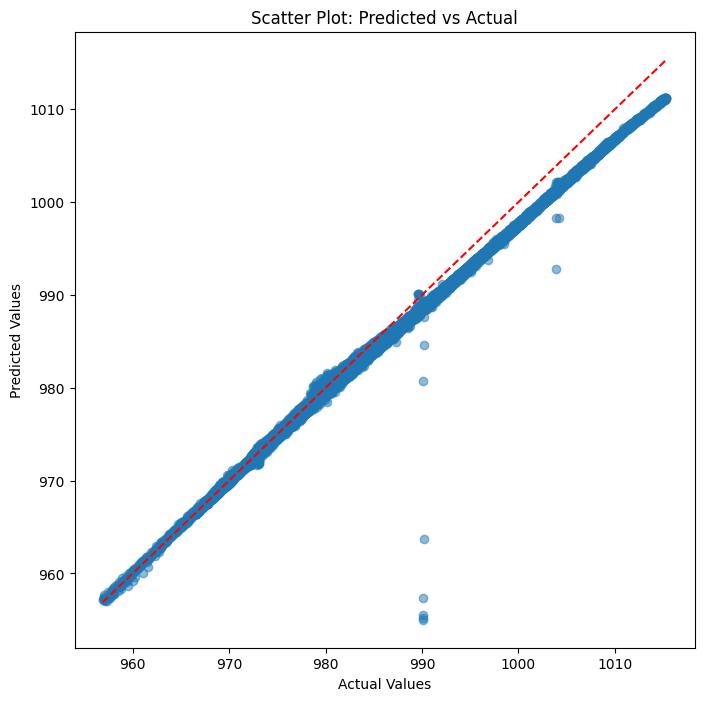

In [41]:
plt.figure(figsize=(8, 8))
plt.scatter(actuals_inv, predictions_inv, alpha=0.5)
plt.plot([min(actuals_inv), max(actuals_inv)], [min(actuals_inv), max(actuals_inv)], 'r--')  # y=x 參考線
plt.title("Scatter Plot: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [42]:
# 挑出部分樣本來檢查預測值與真實值的差異
# 這裡以前 10 個樣本為例
print("Sample\tActual\tPredicted\tDifference")
for i in range(10):
    diff = predictions_inv[i] - actuals_inv[i]
    print(f"{i}\t{actuals_inv[i]:.2f}\t{predictions_inv[i]:.2f}\t{diff:.2f}")

Sample	Actual	Predicted	Difference
0	989.98	988.40	-1.58
1	990.09	988.53	-1.56
2	990.09	988.62	-1.47
3	990.10	988.59	-1.51
4	990.11	988.69	-1.42
5	990.13	988.61	-1.52
6	990.12	988.68	-1.44
7	990.10	988.63	-1.47
8	990.02	988.63	-1.39
9	989.99	988.54	-1.45
